**1)Import the required libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



> 1.1) Check the versions of Tensorflow and Keras



In [ ]:
print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

Tensorflow version: 2.8.2
Keras version: 2.8.0


**2) Load the built-in MNIST Dataset from Keras**

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()



> 2.1) Understand the dataset



Training set shape: (60000, 28, 28)
Training set shape: (10000, 28, 28)



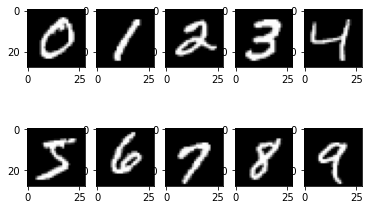

In [ ]:
print(f"Training set shape: {x_train.shape}")
print(f"Training set shape: {x_test.shape}\n")

#find minimum and maximum values of one sample data
np.max(x_train[0]) 
np.min(x_train[0])

#display one sample data/image in gray-scale
plt.imshow(x_train[0],cmap="gray")


#display one image from each class
(x,id) = np.unique(y_train, return_index=True)
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[id[i]],cmap="gray")

**3) Pre-process the dataset**

In [ ]:
#perform normalization
x_train = x_train/255.0
x_test = x_test/255.0

**4) Define the Model (use Sequential API)**

> Input image must be flattened to 1-D vector of size 28*28 = 784, which will be the number of neurons in the input layer.

> Assume that our model has 2 Hidden layers with 300 and 100 neurons, respectively || Activation function = ReLU

> As there are 10 classes, the output layer will have 10 neurons|| Activation function = Softmax


In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer")) 
model.add(tf.keras.layers.Dense(300, activation="relu", name="HiddenLayer1"))
model.add(tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"),)
model.add(tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"))

model.summary()

**5) Compile the Model (Specifying how the model is going to learn)** 



In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #if learning rate is not specified, it takes the default value = 0.001

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

**6) Fit the model (Training)**

In [ ]:
batch_size = 32   #specifies the number of training data used for 1 iteration
epochs = 15       #After an epoch is completed the DNN has seen all of your data and updated its weights accordingly 

#to keep track of execution time
import datetime
start = datetime.datetime.now()

#to fit the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

#to keep track of execution time
end = datetime.datetime.now()
print("\nTime taken to run:", end-start)

6.1) Doing some retrospection after training (via plots)

> If the plots indicate overfitting or underfitting, then go back to step 5 and change the hyperparameters



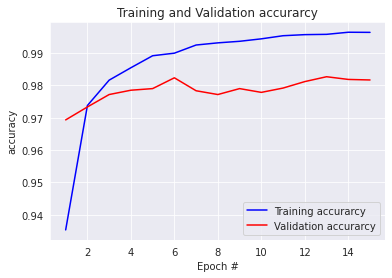

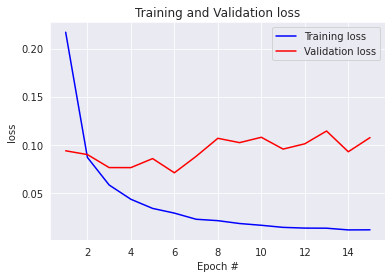

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")

#get the details form the history object which has the training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()

#Train and validation loss
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()


**7) Evaluate**

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1069 - accuracy: 0.9808


[0.1068820208311081, 0.9807999730110168]

**8) Make predictions and visualize the confusion matrix**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_hat = model.predict(x_test, batch_size=32)

#assign the class to the test data, which has max. probability value in y_hat
classes = np.argmax(y_hat, axis=1)

print('Confusion Matrix')
cm = confusion_matrix(y_test, classes)
#cm = confusion_matrix(test_RGB_y, y_pred1)
print(cm)

Confusion Matrix
[[ 970    0    0    1    0    0    3    0    3    3]
 [   1 1125    2    1    0    1    2    1    2    0]
 [   3    0 1013    4    2    0    0    6    4    0]
 [   0    0    3  992    0    8    0    2    3    2]
 [   0    0    7    1  963    0    2    3    0    6]
 [   1    0    0    9    2  873    3    1    1    2]
 [   3    2    3    1    5    5  936    0    3    0]
 [   0    3    6    2    0    0    0 1013    2    2]
 [   3    0    3    5    1   12    0    4  944    2]
 [   0    4    0    2    8    6    0    6    4  979]]


Code to better visualize the confusion matix 

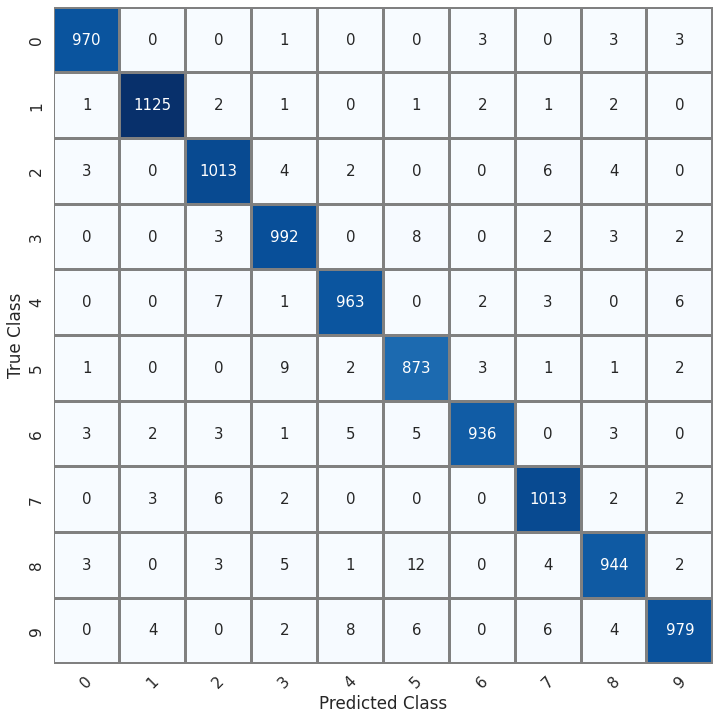

In [ ]:
array_downsize_upsize_random = cm

class_labels=["0", "1","2","3","4","5","6","7","8","9"]

confusion_matrix = pd.DataFrame(array_downsize_upsize_random, index=class_labels, columns=class_labels)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.4) # for label size
g = sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 15}, cmap=plt.cm.Blues, fmt="g", linewidths=2, linecolor='grey',cbar=False, yticklabels=class_labels,xticklabels=class_labels) # font size

g.set_xticklabels(g.get_xticklabels(), rotation = 45)#, fontsize = 1)

plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

plt.show()

In [ ]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, classes))

Accuracy 0.9808
